# Multiple Linear Regression.

## Importing the Libraries


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [4]:
dataset.shape

(50, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset['State'].nunique()

3

<AxesSubplot:xlabel='State', ylabel='count'>

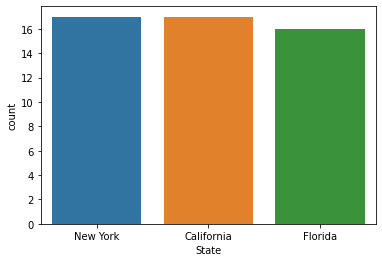

In [9]:
sns.countplot ( x = 'State', data = dataset)

### We have Equal amount of data of every state

In [15]:
 dataset.groupby(["State"]).Profit.sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

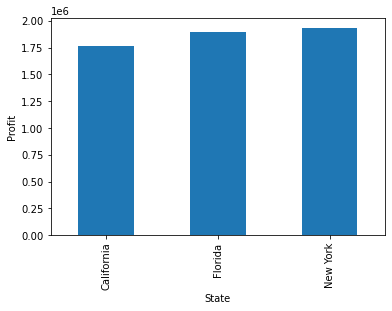

In [16]:
C=dataset.groupby(["State"]).Profit.sum()
C.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

### => New york and Florida has almost same profit
### => California has less profit as compared to other 2 state

In [17]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [19]:
X[:5]

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object)

In [20]:
y[:5]

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94])

# Encoding categorical Data

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
X[:5]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

# Splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

# Training the Multiple Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# Prediction

In [25]:
y_pred=reg.predict(X_test)
y_pred
np.set_printoptions(precision=2)

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


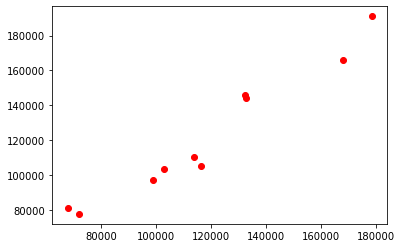

In [27]:
plt.scatter(y_pred, y_test, color = 'red')